# load functions

In [1]:
from getpass import getuser # Libaray to copy things
from tempfile import NamedTemporaryFile, TemporaryDirectory 

import dask

from dask.distributed import Client
import multiprocessing

ncpu = multiprocessing.cpu_count()
threads = 8
nworker = ncpu // threads
print(
    f"Number of CPUs: {ncpu}, number of threads: {threads}, number of workers: {nworker}"
)
client = Client(
    processes=True, threads_per_worker=threads, n_workers=nworker, memory_limit="100GB"
)
client 

# calculation
import metpy.calc as mpcalc

# scipy
from scipy import stats
from scipy.ndimage import measurements
from scipy import ndimage
from scipy.optimize import curve_fit

# for plot
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# basic
from pathlib import Path # Object oriented libary to deal with paths
from dask.utils import format_bytes
from distributed import Client, progress, wait # Libaray to orchestrate distributed resources
import netCDF4 as nc
import numpy as np # Pythons standard array library
import xarray as xr # Libary to work with labeled n-dimensional data

# dask
import dask # Distributed data libary
import dask.distributed
import multiprocessing
from subprocess import run, PIPE
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

Number of CPUs: 256, number of threads: 8, number of workers: 32


2024-10-24 19:26:17,831 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-mjc8ujlc', purging
2024-10-24 19:26:17,837 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-jjmr20s3', purging
2024-10-24 19:26:17,842 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-uxagw9jz', purging
2024-10-24 19:26:17,847 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-g84ajpj6', purging
2024-10-24 19:26:17,851 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Project1/dask-worker-space/worker-boxia_4p', purging
2024-10-24 19:26:17,855 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/Pro

## Load data

In [ ]:
# Variables modify
glob_pattern_pr = '_daily_'
glob_pattern_ev = '_daily_' 

In [3]:
# ctl
path_ctl =Path('/scratch/m/m300948/test_04/pr')
file_ctl = sorted([str(f) for f in path_ctl.glob(f'*{glob_pattern_pr}pr*.nc')])[:]
pr_ctl = xr.open_mfdataset(file_ctl,parallel=True)['pr'].chunk({'time':24})

In [4]:
# def 100
path_def100 =Path('/scratch/m/m300948/def_100/pr')
file_def100 = sorted([str(f) for f in path_def100.glob(f'*{glob_pattern_pr}pr*.nc')])[:]
pr_def100 = xr.open_mfdataset(file_def100,parallel=True)['pr'].chunk({'time':24})

In [10]:
path_icon =Path('/scratch/m/m300948/test_04/hfls')
file_icon = sorted([str(f) for f in path_icon.glob(f'*{glob_pattern_ev}hfls*.nc')])[:]
lh_ctl = xr.open_mfdataset(file_icon,parallel=True)['hfls'].chunk({'time':24})
ev_ctl = lh_ctl/28.94

In [9]:
path_icon =Path('/scratch/m/m300948/def_100/hfls')
file_icon = sorted([str(f) for f in path_icon.glob(f'*{glob_pattern_ev}hfls*.nc')])[:35]
lh_def = xr.open_mfdataset(file_icon,parallel=True)['hfls'].chunk({'time':24})
ev_def100 = lh_def/28.94

## group by month

In [5]:
pr_ctl_month = pr_ctl.sel(time=slice('2020-02-01','2022-12-31')).groupby('time.month').mean('time')
pr_def_month = pr_def100.sel(time=slice('2020-02-01','2022-12-31')).groupby('time.month').mean('time')

#ev_ctl_month = ev_ctl.sel(time=slice('2020-02-01','2022-12-31')).groupby('time.month').mean('time')
#ev_def_month = ev_def100.sel(time=slice('2020-02-01','2022-12-31')).groupby('time.month').mean('time')

In [6]:
# Total average
pr_ctl_2d = pr_ctl_month.mean("month")
pr_def_2d = pr_def_month.mean("month")

#ev_ctl_2d = ev_ctl_month.mean("month")
#ev_def_2d = ev_def_month.mean("month")

In [7]:
pr_ctl_wet_2d = pr_ctl_month.where(pr_ctl_month.month.isin([1,2,12]), drop=True).mean("month")
pr_def_wet_2d = pr_def_month.where(pr_def_month.month.isin([1,2,12]), drop=True).mean("month")

#ev_ctl_wet_2d = ev_ctl_month.where(ev_ctl_month.month.isin([1,2,12]), drop=True).mean("month")
#ev_def_wet_2d = ev_def_month.where(ev_def_month.month.isin([1,2,12]), drop=True).mean("month")

In [8]:
pr_ctl_dry_2d = pr_ctl_month.where(pr_ctl_month.month.isin([7,8,9]), drop=True).mean("month")
pr_def_dry_2d = pr_def_month.where(pr_def_month.month.isin([7,8,9]), drop=True).mean("month")

#ev_ctl_dry_2d = ev_ctl_month.where(ev_ctl_month.month.isin([7,8,9]), drop=True).mean("month")
#ev_def_dry_2d = ev_def_month.where(ev_def_month.month.isin([7,8,9]), drop=True).mean("month")

In [18]:
convg_ctl_2d = pr_ctl_2d*3600*24 + ev_ctl_2d
convg_def_2d = pr_def_2d*3600*24 + ev_def_2d

convg_ctl_wet_2d = pr_ctl_wet_2d*3600*24 + ev_ctl_wet_2d
convg_def_wet_2d = pr_def_wet_2d*3600*24 + ev_def_wet_2d

convg_ctl_dry_2d = pr_ctl_dry_2d*3600*24 + ev_ctl_dry_2d
convg_def_dry_2d = pr_def_dry_2d*3600*24 + ev_def_dry_2d

## Load objects centroid array

In [10]:
sam_ctl_lati = [-0.55,-4.95,3.05]
sam_ctl_loni = [-66.75,-64.55,-67.65]
sam_def_lati = [-2.25,-13.95,2.95]
sam_def_loni = [-69.25,-59.45,-69.35]

## 2D maps of each parameter

In [11]:
def plot_data(title, data, colormap, extend, varmin, varmax, space, 
                    lat_min, lat_max, int_lat, lon_min, lon_max, int_lon):
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    fig  = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111, projection=proj)
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray',
                        xlocs=range(-180,180,30), ylocs=range(-90,90,30), crs=ccrs.PlateCarree())
    
    gl.xlabels_bottom, gl.ylabels_left = False, False
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}

    plot = data.plot(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      cmap=colormap,
                      vmin=varmin,
                      vmax=varmax,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
   
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    bounds = np.linspace(varmin,varmax, space)
    #cb = plt.colorbar(plot, orientation="horizontal", fraction=0.05, pad=0.10, extend=extend,ticks=bounds, boundaries=bounds)
    #cb.ax.tick_params(labelsize=20)
    #cb.ax.set_xticklabels(bounds,rotation=270)
    ax.set_title(title, y=1.1, fontsize=25)

In [12]:
viridis_new = Tools.colormap_create('viridis_r',21,0,1)
BrBG_new = Tools.colormap_create('BrBG',21,9,12)

In [22]:
convg_def_2d = convg_def_2d.compute() 
convg_ctl_2d = convg_ctl_2d.compute()

/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


KeyboardInterrupt: 

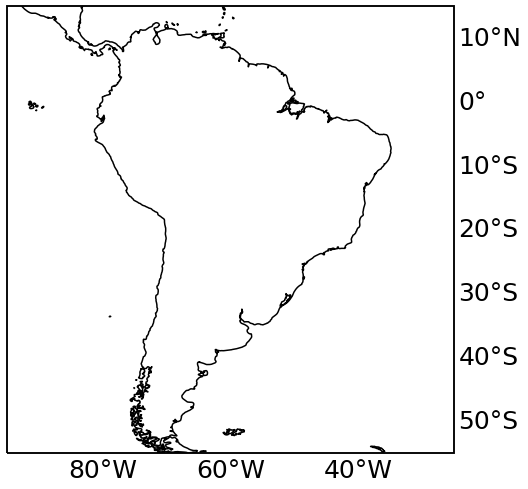

In [21]:
Tools.plot_data_amz_bd(convg_def_2d-convg_ctl_2d, BrBG_new, 'both', -5, 5, 11, 
                     True , sam_ctl_lati[0], sam_ctl_lati[0], 'blue', True, sam_def_lati[0], sam_def_lati[0], 'deeppink',
                     -60, 20, 10, -100, -20, 10,
                    'precipitation [mm/yr]','Annual mean precipitation')

/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


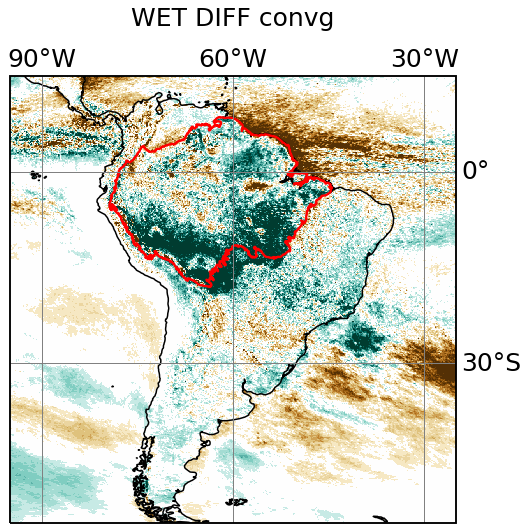

In [17]:
plot_data('WET DIFF convg', convg_def_wet_2d-convg_ctl_wet_2d, 
             BrBG_new, 'both', -5, 5, 21, -60, 20, 10, -100, -20, 20) 

/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/m/m300948/.conda/envs/JUPYTER_MODULE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


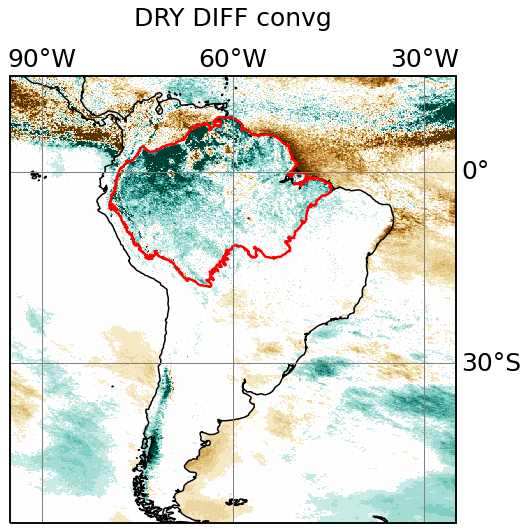

In [18]:
plot_data('DRY DIFF convg', convg_def_dry_2d-convg_ctl_dry_2d, 
             BrBG_new, 'both', -5, 5, 21, -60, 20, 10, -100, -20, 20) 

**Masking**

In [16]:
dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
AMZ_BD = dset_bd.AMAZON_BIOMES

In [17]:
ABinterp_biome = AMZ_BD.interp(latitude=pr_ctl.lat, longitude=pr_ctl.lon)

In [18]:
# each year
pr_ctl_mask_each_1d = pr_ctl.where(ABinterp_biome == 0, np.nan).mean(dim=('lat','lon'), skipna=True)*3600*24
#ev_ctl_mask_each_1d = ev_ctl.where(ABinterp_biome == 0, np.nan).mean(dim=('lat','lon'), skipna=True) 

In [19]:
pr_def_mask_each_1d = pr_def100.where(ABinterp_biome == 0, np.nan).mean(dim=('lat','lon'), skipna=True)*3600*24
#ev_def_mask_each_1d = ev_def100.where(ABinterp_biome == 0, np.nan).mean(dim=('lat','lon'), skipna=True) 

In [20]:
# monthly mean
pr_ctl_mask_1d = pr_ctl_month.where(ABinterp_biome == 0, np.nan).mean(dim=('lat','lon'), skipna=True)*3600*24  
#ev_ctl_mask_1d = ev_ctl_month.where(ABinterp_biome == 0, np.nan).mean(dim=('lat','lon'), skipna=True) 

In [21]:
pr_def_mask_1d = pr_def_month.where(ABinterp_biome == 0, np.nan).mean(dim=('lat','lon'), skipna=True)*3600*24  
#ev_def_mask_1d = ev_def_month.where(ABinterp_biome == 0, np.nan).mean(dim=('lat','lon'), skipna=True) 

_calculate absolute value_

In [22]:
# all
pr_ctl_mask_1d_avg = pr_ctl_mask_1d.mean(dim='month', skipna=True).values
pr_def_mask_1d_avg = pr_def_mask_1d.mean(dim='month', skipna=True).values

#ev_ctl_mask_1d_avg = ev_ctl_mask_1d.mean(dim='month', skipna=True).values
#ev_def_mask_1d_avg = ev_def_mask_1d.mean(dim='month', skipna=True).values

In [23]:
print(pr_ctl_mask_1d_avg)
print(pr_def_mask_1d_avg)

6.9844947
6.704527


In [15]:
diff_pr = pr_def_mask_1d_avg - pr_ctl_mask_1d_avg
print(diff_pr)

-0.27991056


In [29]:
diff_ev = ev_ctl_mask_1d_avg - ev_def_mask_1d_avg
print(diff_ev)

-2.056433


In [16]:
# wet
pr_ctl_mask_1d_wet = pr_ctl_mask_1d.where(pr_ctl_mask_1d.month.isin([1,2,12]), drop=True).mean("month")
pr_def_mask_1d_wet = pr_def_mask_1d.where(pr_def_mask_1d.month.isin([1,2,12]), drop=True).mean("month")

ev_ctl_mask_1d_wet = ev_ctl_mask_1d.where(ev_ctl_mask_1d.month.isin([1,2,12]), drop=True).mean("month")
ev_def_mask_1d_wet = ev_def_mask_1d.where(ev_def_mask_1d.month.isin([1,2,12]), drop=True).mean("month")

NameError: name 'ev_ctl_mask_1d' is not defined

In [17]:
# dry
pr_ctl_mask_1d_dry = pr_ctl_mask_1d.where(pr_ctl_mask_1d.month.isin([7,8,9]), drop=True).mean("month")
pr_def_mask_1d_dry = pr_def_mask_1d.where(pr_def_mask_1d.month.isin([7,8,9]), drop=True).mean("month")

ev_ctl_mask_1d_dry = ev_ctl_mask_1d.where(ev_ctl_mask_1d.month.isin([7,8,9]), drop=True).mean("month")
ev_def_mask_1d_dry = ev_def_mask_1d.where(ev_def_mask_1d.month.isin([7,8,9]), drop=True).mean("month")

NameError: name 'ev_ctl_mask_1d' is not defined

In [32]:
diff_pr_wet = pr_def_mask_1d_wet - pr_ctl_mask_1d_wet
diff_pr_dry = pr_def_mask_1d_dry - pr_ctl_mask_1d_dry
diff_ev_wet = ev_ctl_mask_1d_wet - ev_def_mask_1d_wet
diff_ev_dry = ev_ctl_mask_1d_dry - ev_def_mask_1d_dry

In [33]:
print(diff_pr_wet.values)
print(diff_pr_dry.values)
print(diff_ev_wet.values)
print(diff_ev_dry.values)

-0.2995243
-0.5954683
-2.2129998
-2.1109018


_seperate into each year_

In [24]:
# ctl
pr_ctl_mask_each_2020 = pr_ctl_mask_each_1d.sel(time=slice('2020-02-01','2020-12-31'))
pr_ctl_mask_each_2021 = pr_ctl_mask_each_1d.sel(time=slice('2021-01-01','2021-12-31'))
pr_ctl_mask_each_2022 = pr_ctl_mask_each_1d.sel(time=slice('2022-01-01','2022-12-31'))

In [16]:
ev_ctl_mask_each_2020 = ev_ctl_mask_each_1d.sel(time=slice('2020-02-01','2020-12-31'))
ev_ctl_mask_each_2021 = ev_ctl_mask_each_1d.sel(time=slice('2021-01-01','2021-12-31'))
ev_ctl_mask_each_2022 = ev_ctl_mask_each_1d.sel(time=slice('2022-01-01','2022-11-30'))

NameError: name 'ev_ctl_mask_each_1d' is not defined

In [25]:
# def
pr_def_mask_each_2020 = pr_def_mask_each_1d.sel(time=slice('2020-02-01','2020-12-31'))
pr_def_mask_each_2021 = pr_def_mask_each_1d.sel(time=slice('2021-01-01','2021-12-31'))
pr_def_mask_each_2022 = pr_def_mask_each_1d.sel(time=slice('2022-01-01','2022-12-31'))

In [37]:
ev_def_mask_each_2020 = ev_def_mask_each_1d.sel(time=slice('2020-02-01','2020-12-31'))
ev_def_mask_each_2021 = ev_def_mask_each_1d.sel(time=slice('2021-01-01','2021-12-31'))
ev_def_mask_each_2022 = ev_def_mask_each_1d.sel(time=slice('2022-01-01','2022-11-30'))

_remove the year for the data_

In [26]:
pr_ctl_mask_each_2020 = pr_ctl_mask_each_2020.groupby('time.month').mean('time')
pr_ctl_mask_each_2021 = pr_ctl_mask_each_2021.groupby('time.month').mean('time')
pr_ctl_mask_each_2022 = pr_ctl_mask_each_2022.groupby('time.month').mean('time')

In [27]:
pr_def_mask_each_2020 = pr_def_mask_each_2020.groupby('time.month').mean('time')
pr_def_mask_each_2021 = pr_def_mask_each_2021.groupby('time.month').mean('time')
pr_def_mask_each_2022 = pr_def_mask_each_2022.groupby('time.month').mean('time')

In [40]:
ev_ctl_mask_each_2020 = ev_ctl_mask_each_2020.groupby('time.month').mean('time')
ev_ctl_mask_each_2021 = ev_ctl_mask_each_2021.groupby('time.month').mean('time')
ev_ctl_mask_each_2022 = ev_ctl_mask_each_2022.groupby('time.month').mean('time')

In [41]:
ev_def_mask_each_2020 = ev_def_mask_each_2020.groupby('time.month').mean('time')
ev_def_mask_each_2021 = ev_def_mask_each_2021.groupby('time.month').mean('time')
ev_def_mask_each_2022 = ev_def_mask_each_2022.groupby('time.month').mean('time')

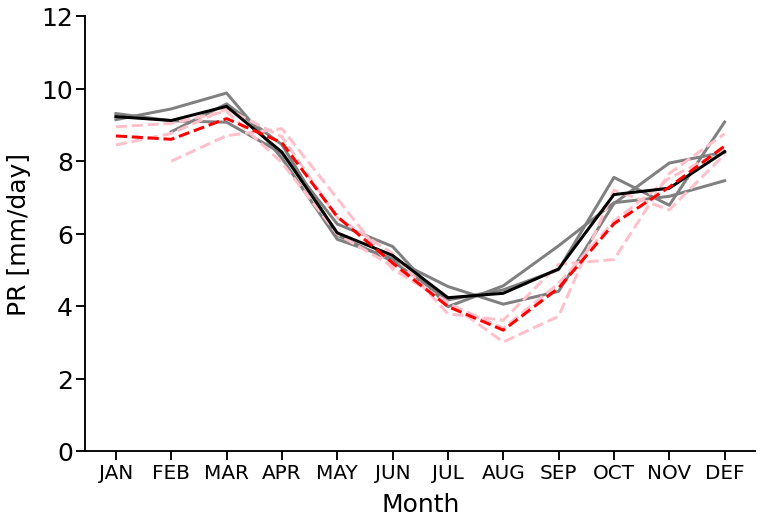

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
pr_ctl_mask_each_2020.plot(c='grey',linewidth=3)
pr_ctl_mask_each_2021.plot(c='grey',linewidth=3)
pr_ctl_mask_each_2022.plot(c='grey',linewidth=3)

pr_def_mask_each_2020.plot(c='pink',linewidth=3, ls='--')
pr_def_mask_each_2021.plot(c='pink',linewidth=3, ls='--')
pr_def_mask_each_2022.plot(c='pink',linewidth=3, ls='--')

pr_ctl_mask_1d.plot(label='CTL',c='black',linewidth=3)
pr_def_mask_1d.plot(label='DEF100',c='red',linewidth=3, ls='--')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylabel('PR [mm/day]',fontsize=25, labelpad = 10)
ax.set_xlabel('Month',fontsize=25, labelpad = 10)
#plt.xlabel('Difference PR [mm/day]',fontsize=25, labelpad = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEF'],fontsize=20)
plt.ylim(0,12)
ax.spines[['right', 'top']].set_visible(False)

In [28]:
pr_ctl_mask_each_2020 = pr_ctl_mask_each_2020 .compute()
pr_ctl_mask_each_2021 = pr_ctl_mask_each_2021 .compute()
pr_ctl_mask_each_2022 = pr_ctl_mask_each_2022 .compute()

In [29]:
pr_def_mask_each_2020 = pr_def_mask_each_2020 .compute()
pr_def_mask_each_2021 = pr_def_mask_each_2021 .compute()
pr_def_mask_each_2022 = pr_def_mask_each_2022 .compute()

In [30]:
pr_ctl_mask_1d = pr_ctl_mask_1d.compute()
pr_def_mask_1d = pr_def_mask_1d.compute()

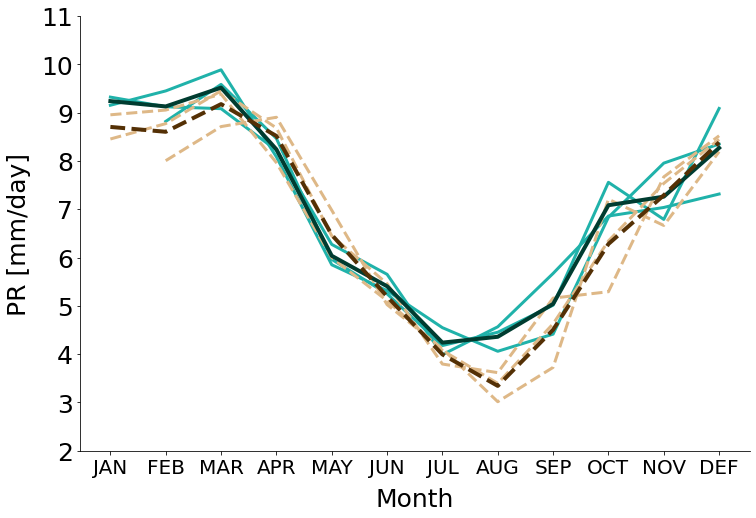

In [51]:
fig, ax = plt.subplots(figsize=(12,8))

# get color from BrBG
cmap = matplotlib.cm.get_cmap('BrBG')
left = cmap(0.0)
right = cmap(1.0)

# lightseagreen
pr_ctl_mask_each_2020.plot(c='lightseagreen',linewidth=3)
pr_ctl_mask_each_2021.plot(c='lightseagreen',linewidth=3)
pr_ctl_mask_each_2022.plot(c='lightseagreen',linewidth=3)

# burlywood
pr_def_mask_each_2020.plot(c='burlywood',linewidth=3, ls='--')
pr_def_mask_each_2021.plot(c='burlywood',linewidth=3, ls='--')
pr_def_mask_each_2022.plot(c='burlywood',linewidth=3, ls='--')

pr_ctl_mask_1d.plot(label='CTL',c=right,linewidth=4)
pr_def_mask_1d.plot(label='DEF100',c=left,linewidth=4, ls='--')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylabel('PR [mm/day]',fontsize=25, labelpad = 10)
ax.set_xlabel('Month',fontsize=25, labelpad = 10)
#plt.xlabel('Difference PR [mm/day]',fontsize=25, labelpad = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEF'],fontsize=20)
plt.ylim(2,11)
ax.spines[['right', 'top']].set_visible(False)

## Load 30years data

In [7]:
df_30 = pd.read_excel('/home/m/m300948/ICON_AMZDEF/Project1/csv/ICON_30yrs_amzbasin_pr_final.xlsx',engine='openpyxl')

In [25]:
df_30

,month,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,1,7.295034,9.500421,7.470751,7.662053,7.216185,9.502269,7.584026,9.510885,7.921628,...,7.470751,7.662053,11.788353,14.074437,7.584026,6.332371,4.743114,7.892296,7.353408,6.487248
1,2,8.021531,9.544718,8.206777,6.330792,8.058218,9.052851,8.060174,9.431026,7.368606,...,7.803012,7.712810,7.622608,7.532406,7.442204,9.431026,7.368606,7.696780,7.290271,5.506067
2,3,8.425933,8.382117,7.949227,7.171397,7.481278,8.006356,8.139246,8.762575,7.439357,...,7.083447,7.171397,7.481278,9.058945,9.437054,9.815164,7.439357,8.020350,6.459919,7.336804
3,4,7.925684,7.238712,7.173627,6.575538,6.605071,7.337679,7.169116,7.390137,6.943523,...,7.173627,7.575538,6.605071,7.337679,6.941999,6.829203,6.716406,7.151945,8.022578,7.384736
4,5,6.634086,7.305354,6.805614,6.706061,7.931979,6.877405,6.913345,6.432754,6.700194,...,6.805614,6.706061,7.931979,6.949285,6.985225,6.432754,6.700194,5.558010,6.432060,7.409006
5,6,5.438393,5.083713,6.256588,5.621481,5.477710,5.645930,5.403300,5.092497,6.047582,...,6.460579,6.729463,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,5.735256,6.157725
6,7,3.116287,2.949922,3.337890,3.555894,3.802722,4.390086,4.441210,4.019798,4.254040,...,4.113826,3.555894,3.802722,4.390086,4.441210,3.744352,3.717460,3.690567,4.066894,4.481507
7,8,3.154870,3.053197,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,...,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,2.335358,3.375799,3.141181
8,9,3.165568,3.315896,4.343988,3.636385,4.446707,3.983347,4.406753,4.038705,4.285084,...,4.875435,5.143918,5.412401,3.983347,4.121845,4.061011,4.000176,4.331636,3.569808,3.755937
9,10,5.509257,4.337185,5.742354,5.380336,6.017025,5.055644,5.766363,5.294201,5.258187,...,5.509342,5.481675,5.454007,5.426340,5.398673,5.294201,5.258187,5.050179,5.806393,6.121981


In [8]:
df_30_ready=df_30.drop('month', axis=1)
df_30_ready

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,7.295034,9.500421,7.470751,7.662053,7.216185,9.502269,7.584026,9.510885,7.921628,7.892296,...,7.470751,7.662053,11.788353,14.074437,7.584026,6.332371,4.743114,7.892296,7.353408,6.487248
1,8.021531,9.544718,8.206777,6.330792,8.058218,9.052851,8.060174,9.431026,7.368606,7.696780,...,7.803012,7.712810,7.622608,7.532406,7.442204,9.431026,7.368606,7.696780,7.290271,5.506067
2,8.425933,8.382117,7.949227,7.171397,7.481278,8.006356,8.139246,8.762575,7.439357,7.020350,...,7.083447,7.171397,7.481278,9.058945,9.437054,9.815164,7.439357,8.020350,6.459919,7.336804
3,7.925684,7.238712,7.173627,6.575538,6.605071,7.337679,7.169116,7.390137,6.943523,7.151945,...,7.173627,7.575538,6.605071,7.337679,6.941999,6.829203,6.716406,7.151945,8.022578,7.384736
4,6.634086,7.305354,6.805614,6.706061,7.931979,6.877405,6.913345,6.432754,6.700194,5.558010,...,6.805614,6.706061,7.931979,6.949285,6.985225,6.432754,6.700194,5.558010,6.432060,7.409006
5,5.438393,5.083713,6.256588,5.621481,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,...,6.460579,6.729463,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,5.735256,6.157725
6,3.116287,2.949922,3.337890,3.555894,3.802722,4.390086,4.441210,4.019798,4.254040,3.713565,...,4.113826,3.555894,3.802722,4.390086,4.441210,3.744352,3.717460,3.690567,4.066894,4.481507
7,3.154870,3.053197,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,3.371732,...,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,2.335358,3.375799,3.141181
8,3.165568,3.315896,4.343988,3.636385,4.446707,3.983347,4.406753,4.038705,4.285084,4.331636,...,4.875435,5.143918,5.412401,3.983347,4.121845,4.061011,4.000176,4.331636,3.569808,3.755937
9,5.509257,4.337185,5.742354,5.380336,6.017025,5.055644,5.766363,5.294201,5.258187,5.050179,...,5.509342,5.481675,5.454007,5.426340,5.398673,5.294201,5.258187,5.050179,5.806393,6.121981


In [9]:
df_30_int = df_30_ready.astype(float)

In [10]:
df_30_int['mean'] = df_30_int.iloc[:, 1:30].mean(axis=1,numeric_only=True)

In [11]:
df_30_int['std'] = df_30_int.iloc[:, 1:30].std(axis=1,numeric_only=True)

In [12]:
df_30_int

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2042,2043,2044,2045,2046,2047,2048,2049,mean,std
0,7.295034,9.500421,7.470751,7.662053,7.216185,9.502269,7.584026,9.510885,7.921628,7.892296,...,11.788353,14.074437,7.584026,6.332371,4.743114,7.892296,7.353408,6.487248,8.030979,1.802019
1,8.021531,9.544718,8.206777,6.330792,8.058218,9.052851,8.060174,9.431026,7.368606,7.696780,...,7.622608,7.532406,7.442204,9.431026,7.368606,7.696780,7.290271,5.506067,7.633812,1.089729
2,8.425933,8.382117,7.949227,7.171397,7.481278,8.006356,8.139246,8.762575,7.439357,7.020350,...,7.481278,9.058945,9.437054,9.815164,7.439357,8.020350,6.459919,7.336804,7.746599,0.885105
3,7.925684,7.238712,7.173627,6.575538,6.605071,7.337679,7.169116,7.390137,6.943523,7.151945,...,6.605071,7.337679,6.941999,6.829203,6.716406,7.151945,8.022578,7.384736,7.065732,0.508578
4,6.634086,7.305354,6.805614,6.706061,7.931979,6.877405,6.913345,6.432754,6.700194,5.558010,...,7.931979,6.949285,6.985225,6.432754,6.700194,5.558010,6.432060,7.409006,6.730583,0.684973
5,5.438393,5.083713,6.256588,5.621481,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,...,5.477710,5.645930,5.403300,5.092497,6.047582,5.587418,5.735256,6.157725,5.712349,0.420482
6,3.116287,2.949922,3.337890,3.555894,3.802722,4.390086,4.441210,4.019798,4.254040,3.713565,...,3.802722,4.390086,4.441210,3.744352,3.717460,3.690567,4.066894,4.481507,3.871972,0.389199
7,3.154870,3.053197,2.722782,3.055060,3.593040,2.787576,3.425082,3.028582,3.314236,3.371732,...,3.593040,2.787576,3.425082,3.028582,3.314236,2.335358,3.375799,3.141181,3.139918,0.305718
8,3.165568,3.315896,4.343988,3.636385,4.446707,3.983347,4.406753,4.038705,4.285084,4.331636,...,5.412401,3.983347,4.121845,4.061011,4.000176,4.331636,3.569808,3.755937,4.098186,0.541051
9,5.509257,4.337185,5.742354,5.380336,6.017025,5.055644,5.766363,5.294201,5.258187,5.050179,...,5.454007,5.426340,5.398673,5.294201,5.258187,5.050179,5.806393,6.121981,5.432981,0.476217


In [13]:
df_30_int.insert(0, "month", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

<ErrorbarContainer object of 3 artists>

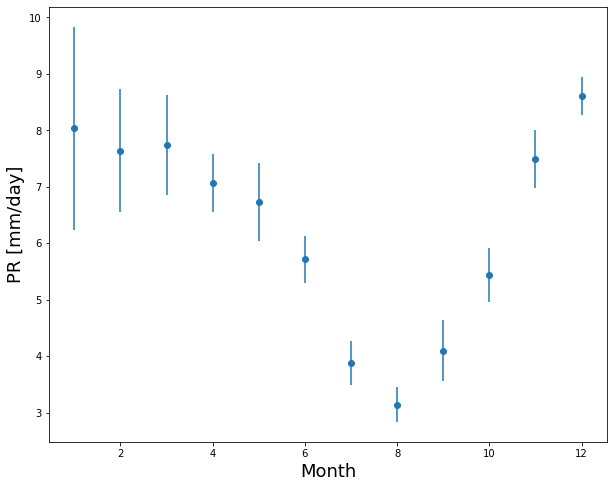

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) 
# Set the axis lables
ax.set_xlabel('Month', fontsize = 18)
ax.set_ylabel('PR [mm/day]', fontsize = 18)

ax.errorbar(df_30_int["month"], df_30_int["mean"], df_30_int["std"], linestyle='None', marker='o')

_take mean from ctl data_

In [31]:
mean = pr_ctl_mask_1d.values
std = df_30_int["std"].values

In [32]:
clima_std = df_30_int["std"].values
clima_mean = df_30_int["mean"].values
clima_std_mean = clima_std.mean()
clima_mean_mean = clima_mean.mean()

In [33]:
print(mean)
print(clima_mean_mean)
print(clima_std_mean)

[9.236334  9.12671   9.515778  8.2386265 6.0318537 5.4051948 4.238817
 4.3596683 5.039633  7.0824738 7.269071  8.269775 ]
6.296792465517242
0.6626072018368462


In [ ]:
plt.errorbar(df_30_int["month"], mean, std, linestyle='None', marker='o')

# Final plot

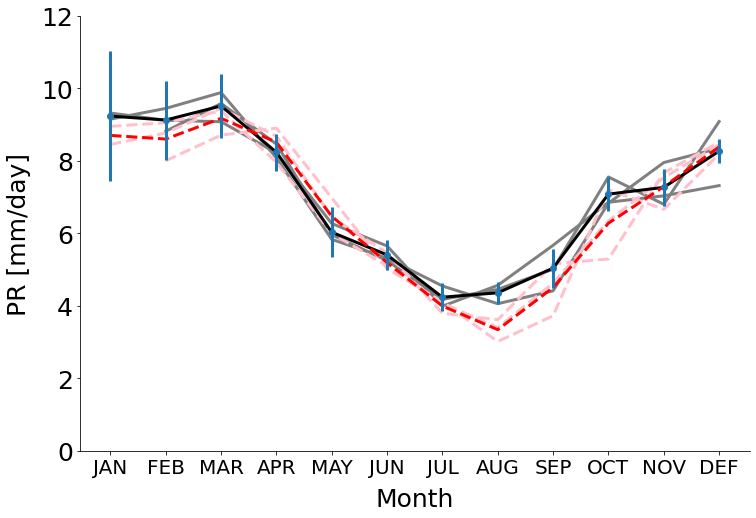

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
pr_ctl_mask_each_2020.plot(c='grey',linewidth=3)
pr_ctl_mask_each_2021.plot(c='grey',linewidth=3)
pr_ctl_mask_each_2022.plot(c='grey',linewidth=3)

pr_def_mask_each_2020.plot(c='pink',linewidth=3, ls='--')
pr_def_mask_each_2021.plot(c='pink',linewidth=3, ls='--')
pr_def_mask_each_2022.plot(c='pink',linewidth=3, ls='--')

pr_ctl_mask_1d.plot(label='CTL',c='black',linewidth=3)
pr_def_mask_1d.plot(label='DEF100',c='red',linewidth=3, ls='--')

plt.errorbar(df_30_int["month"], mean, std, linestyle='None', marker='o', linewidth=3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylabel('PR [mm/day]',fontsize=25, labelpad = 10)
ax.set_xlabel('Month',fontsize=25, labelpad = 10)
#plt.xlabel('Difference PR [mm/day]',fontsize=25, labelpad = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEF'],fontsize=20)
plt.ylim(0,12)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
pr_ctl_mask_each_2020.plot(c='grey',linewidth=3)
pr_ctl_mask_each_2021.plot(c='grey',linewidth=3)
pr_ctl_mask_each_2022.plot(c='grey',linewidth=3)

pr_def_mask_each_2020.plot(c='pink',linewidth=3, ls='--')
pr_def_mask_each_2021.plot(c='pink',linewidth=3, ls='--')
pr_def_mask_each_2022.plot(c='pink',linewidth=3, ls='--')

pr_ctl_mask_1d.plot(label='CTL',c='black',linewidth=3)
pr_def_mask_1d.plot(label='DEF100',c='red',linewidth=3, ls='--')

plt.errorbar(df_30_int["month"], mean, std, linestyle='None', marker='o', linewidth=3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylabel('PR [mm/day]',fontsize=25, labelpad = 10)
ax.set_xlabel('Month',fontsize=25, labelpad = 10)
#plt.xlabel('Difference PR [mm/day]',fontsize=25, labelpad = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEF'],fontsize=20)
plt.ylim(0,12)
ax.spines[['right', 'top']].set_visible(False)

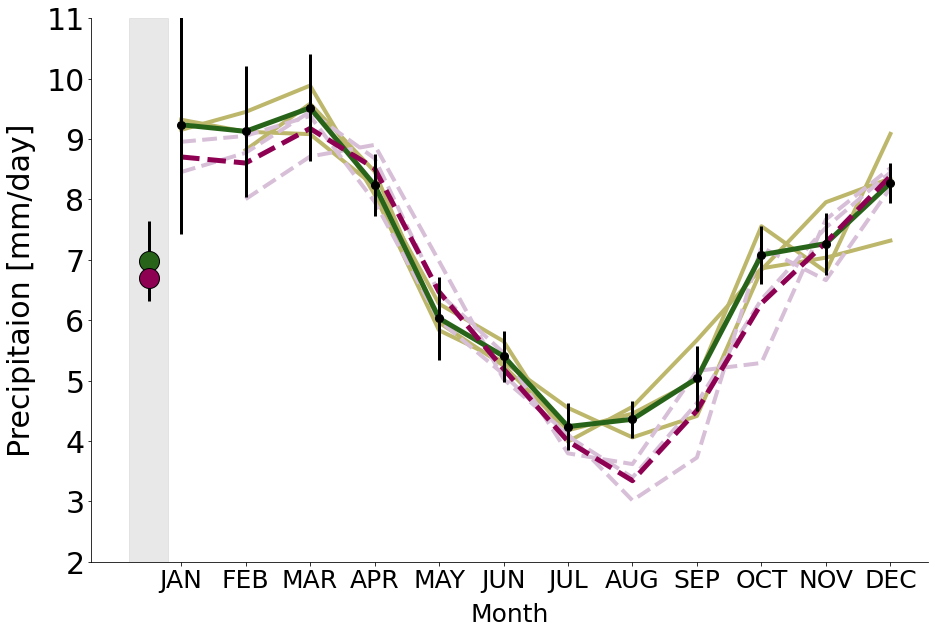

In [54]:
fig, ax = plt.subplots(figsize=(15,10))

# get color from BrBG
cmap = matplotlib.cm.get_cmap('PiYG')
left = cmap(0.0)
right = cmap(1.0)

# CTL
pr_ctl_mask_each_2020.plot(c='darkkhaki',linewidth=4)
pr_ctl_mask_each_2021.plot(c='darkkhaki',linewidth=4)
pr_ctl_mask_each_2022.plot(c='darkkhaki',linewidth=4)

# DEF
pr_def_mask_each_2020.plot(c='thistle',linewidth=4, ls='--')
pr_def_mask_each_2021.plot(c='thistle',linewidth=4, ls='--')
pr_def_mask_each_2022.plot(c='thistle',linewidth=4, ls='--')

pr_ctl_mask_1d.plot(label='CTL',c=right,linewidth=5)
pr_def_mask_1d.plot(label='DEF100',c=left,linewidth=5, ls='--')

plt.errorbar(df_30_int["month"], mean, std, linestyle='None', marker='o', markersize='8', linewidth=3, c='black')

#plt.scatter(1,6.98, c=right, marker='o', s=150)
plt.errorbar(0.5,6.98,yerr=0.662, c=right, ecolor='black', marker='o', markersize='20', markeredgecolor='black', linewidth=3) #, s=150) # CTL with Climatology error bar
#plt.scatter(1,6.70, c=left, marker='o',  markersize='10')
plt.errorbar(0.5,6.70,yerr=0, c=left, marker='o', markeredgecolor='black', markersize='20')

#plt.axvline(x=0.2, ymin=0.4, ymax=0.7, color='black', linestyle='--', linewidth=2)
#plt.axvline(x=0.8, ymin=0.4, ymax=0.7, color='black', linestyle='--', linewidth=2)
ax.axvspan(0.2, 0.8, alpha=0.5, color='lightgrey')

#plt.xticks(fontsize=30)
plt.yticks(fontsize=30,family='Arial')
ax.set_ylabel('Precipitaion [mm/day]',fontsize=30, labelpad = 10,family='Arial')
ax.set_xlabel('Month',fontsize=25, labelpad = 10)
#plt.xlabel('Difference PR [mm/day]',fontsize=25, labelpad = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],fontsize=25,family='Arial')
plt.ylim(2,11)
ax.spines[['right', 'top']].set_visible(False)

#fig.savefig('./pr_exp.png', transparent=True)